In [60]:
from lib.munge import add_lags, split_sample_bytime
import pandas as pd
from sklearn.linear_model import LassoLarsIC
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.dpi'] = 100

#### Build a LASSO model.

In [61]:
## 1. Read the data serialized by visualize.ipynb
data = pd.read_pickle('../data/rates.p')

## 2. Add up to 3 lags and drop holes created from lagging, or holidays.
lagged = add_lags(data, 3).dropna()

## 3. Train/test split.
lagged.index = pd.to_datetime(lagged.index, utc=True)
X_train, y_train, X_holdout, y_holdout = split_sample_bytime(lagged)

## 4. Train model.
model = LassoLarsIC(criterion = 'bic',
                    normalize = True,
                    positive = False).fit(X_train, y_train)

#### Compare the training error and the out-of-time holdout error.

In [62]:
pd.DataFrame({'Training Set': model.score(X_train, y_train),
              'Holdout Set': model.score(X_holdout, y_holdout)},
             index = ['R^2']
            ).round(3)

,Training Set,Holdout Set
R^2,0.979,0.942


#### Performance check: predicted rates vs the heldout actual rates (2018 time period).

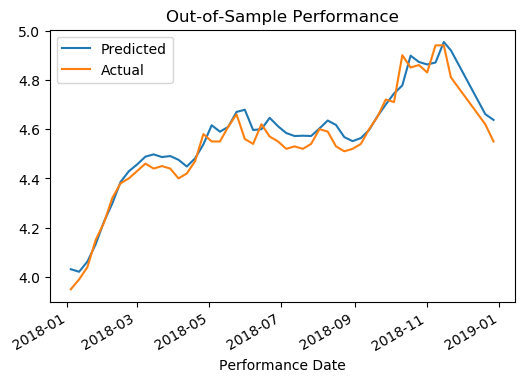

In [63]:
pd.DataFrame({'Predicted': model.predict(X_holdout),
              'Actual': y_holdout}
            ).plot(title='Out-of-Sample Performance')

#### Print the coefficients of the LASSO model.

In [64]:
pd.DataFrame(model.coef_, 
             index = X_train.columns,
             columns = ['Coefficient']
            ).applymap(lambda x: str(round(x)) if x == 0 else x)

,Coefficient
15-Year Mortgage,0.281132
5/1 Adjustable Rate Mortgage,0
Origination Fees/Discounts for 30-Year Mortgage,0
Origination Fees/Discounts for 15-Year Mortgage,0
Origination Fees/Discounts for 5/1 Adjustable Rate Mortgage,0
30-Year Mortgage lag1,0.680522
30-Year Mortgage lag2,0
30-Year Mortgage lag3,0
15-Year Mortgage lag1,0
15-Year Mortgage lag2,0
